In [1]:
import numpy as np
import matplotlib.pyplot as plt

import chainer.optimizers as Opt
import chainer.functions as F
import chainer.links as L
from chainer import Variable,Chain,config 

import princess as ohm

In [2]:
M = 100
time_data = np.linspace(0.0,10.0,M)
#time_data = np.linspace(0.0,10.0,0.1)

In [3]:
N = 2
value_data = np.sin(time_data) + 2.0*np.sin(2.0*time_data)
xdata = []
tdata = []
for k in range(N,M):
    xdata.append(value_data[k-N:k])
    tdata.append(value_data[k])
xdata = np.array(xdata).astype(np.float32)
tdata = np.array(tdata).reshape(M-N,1).astype(np.float32)

In [4]:
D,N = xdata.shape
print(D,N)

98 2


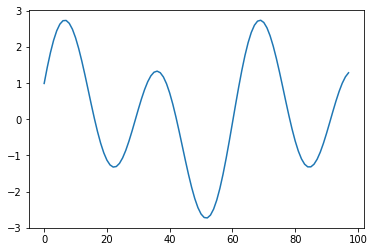

In [5]:
plt.plot(tdata)
plt.show()

In [6]:
C = 1
H1 = 5
H2 = 5
H3 = 5
layers = {}
layers["l1"] = L.Linear(N,H1)
layers["l2"] = L.Linear(H1,H2)
layers["l3"] = L.Linear(H2,H3)
layers["l4"]=L.Linear(H3,C)
layers["bnorm1"] = L.BatchNormalization(H1)
layers["bnorm2"] = L.BatchNormalization(H2)
layers["bnorm3"] = L.BatchNormalization(H3)
NN = Chain(**layers)

def model(x):
    h = NN.l1(x)
    h = F.relu(h)
    h = NN.bnorm1(h)
    h = NN.l2(h)
    h = F.relu(h)
    h = NN.bnorm2(h)
    h = NN.l3(h)
    h = F.relu(h)
    h = NN.bnorm3(h)
    y = NN.l4(h)
    return y

In [7]:
optNN = Opt.MomentumSGD()
optNN.setup(NN)

In [8]:
train_loss = []
test_loss = []

Dtrain = D//3
xtrain,xtest,ttrain,ttest = ohm.data_divide(Dtrain,D,xdata,tdata,'off')
data = [xtrain,xtest,ttrain,ttest]
result = [train_loss,test_loss]

In [9]:
ohm.learning_regression(model,optNN,data,result,200)

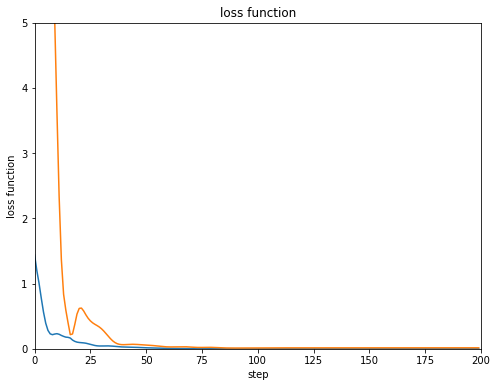

In [10]:
ohm.plot_result2(result[0],result[1],"loss function","step","loss function",0.0,5)

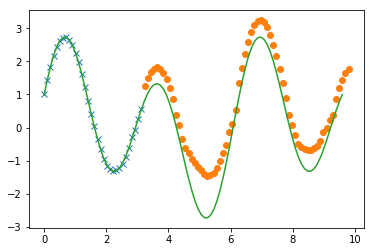

In [11]:
ytrain = model(xtrain).data
ytest = model(xtest).data
plt.plot(time_data[0:Dtrain],ytrain,marker='x',linestyle='None')
plt.plot(time_data[Dtrain:D],ytest,marker='o',linestyle='None')
plt.plot(time_data[0:D-N],value_data[N:D])
plt.show()